In [1]:
import os
import numpy as np
import pandas as pd
import xarray as xr

import matplotlib as mpl
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import warnings
warnings.filterwarnings('ignore')
from pylab import *
from matplotlib.colors import ListedColormap,LinearSegmentedColormap
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.patches import Wedge, Circle
import geopandas as gpd
from shapely.geometry import Point
from datetime import datetime
import datetime
import glob

In [2]:
pattern_june = '/N/project/Zli_lab/Data/Observations/NCAR/prec_acc_files/*_????-06-??_*.nc'
pattern_july = '/N/project/Zli_lab/Data/Observations/NCAR/prec_acc_files/*_????-07-??_*.nc'
pattern_aug  = '/N/project/Zli_lab/Data/Observations/NCAR/prec_acc_files/*_????-08-??_*.nc'

files_june = glob.glob(pattern_june)
files_july = glob.glob(pattern_july)
files_aug  = glob.glob(pattern_aug)

files_jja = sorted(files_june + files_july + files_aug)

In [3]:
ds1 = xr.open_dataset('re_p.nc')
ds2 = xr.open_mfdataset(files_jja[0:24], chunks=None)

In [4]:
ds1

<xarray.Dataset> Size: 15MB
Dimensions:      (Time: 24, lat: 261, lon: 591)
Coordinates:
  * Time         (Time) datetime64[ns] 192B 1980-06-01 ... 1980-06-01T23:00:00
    XTIME        (Time) datetime64[ns] 192B ...
  * lon          (lon) float32 2kB -125.0 -124.9 -124.8 ... -66.2 -66.1 -66.0
  * lat          (lat) float32 1kB 50.0 49.9 49.8 49.7 ... 24.3 24.2 24.1 24.0
Data variables:
    PREC_ACC_NC  (Time, lat, lon) float32 15MB ...
Attributes:
    regrid_method:  bilinear

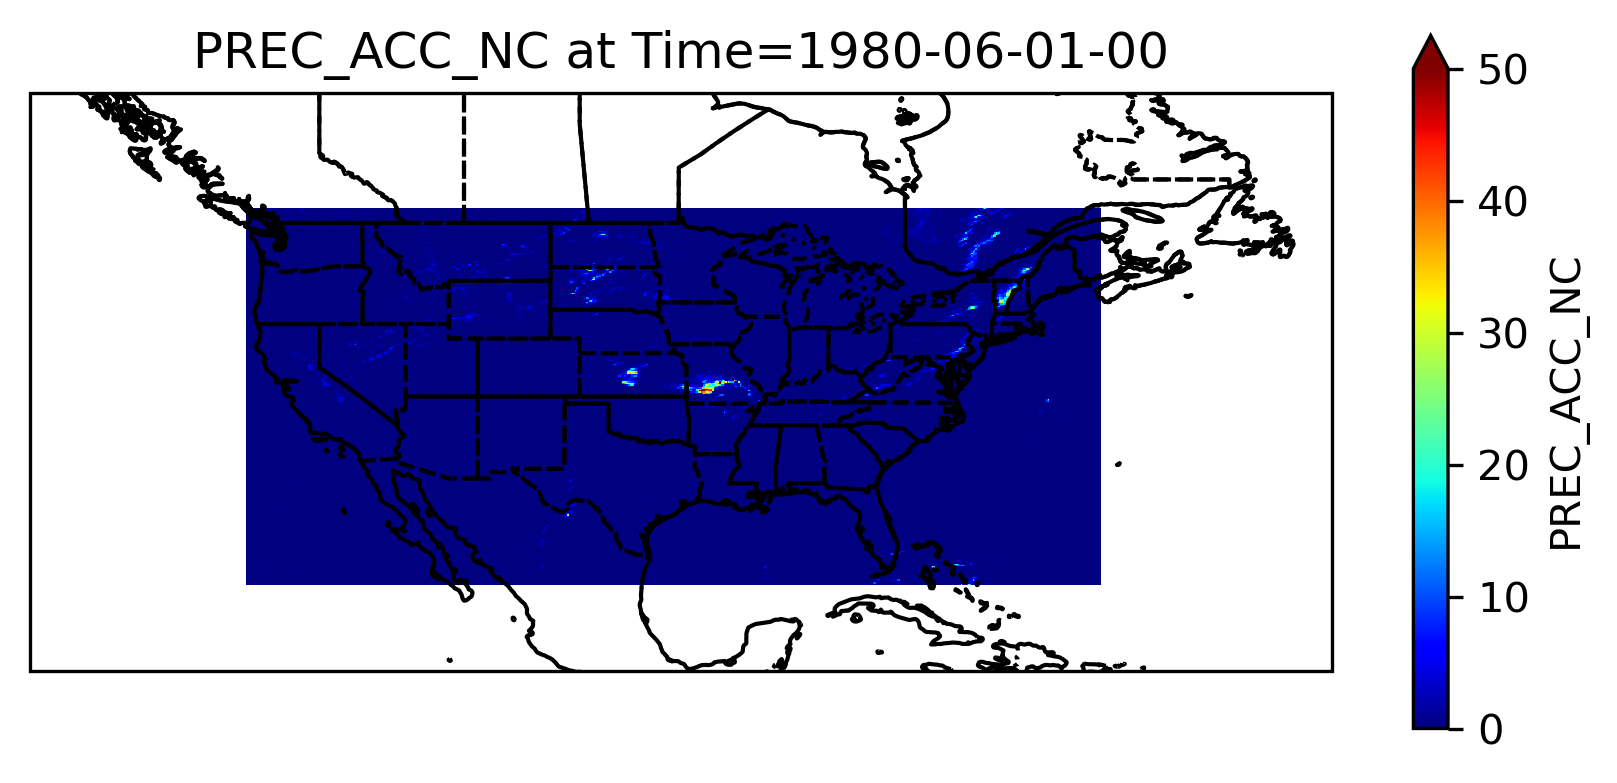

In [9]:

ds_sel = ds1.isel(Time=0)

fig = plt.figure(figsize=(7, 3), dpi=300)
ax = plt.axes(projection=ccrs.PlateCarree())

contour = ds_sel['PREC_ACC_NC'].plot(
    ax=ax,
    x='lon',
    y='lat',
    cmap='jet',                      # 颜色表可自定义
    transform=ccrs.PlateCarree(), vmax=50,
    cbar_kwargs={'label': 'PREC_ACC_NC'}  # Colorbar 标签
)

# 4. 添加地理要素
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.STATES, edgecolor='black', linestyle='--')

ax.set_extent([-140, -50, 18, 58], crs=ccrs.PlateCarree())

plt.title("PREC_ACC_NC at Time=1980-06-01-00")
plt.show()


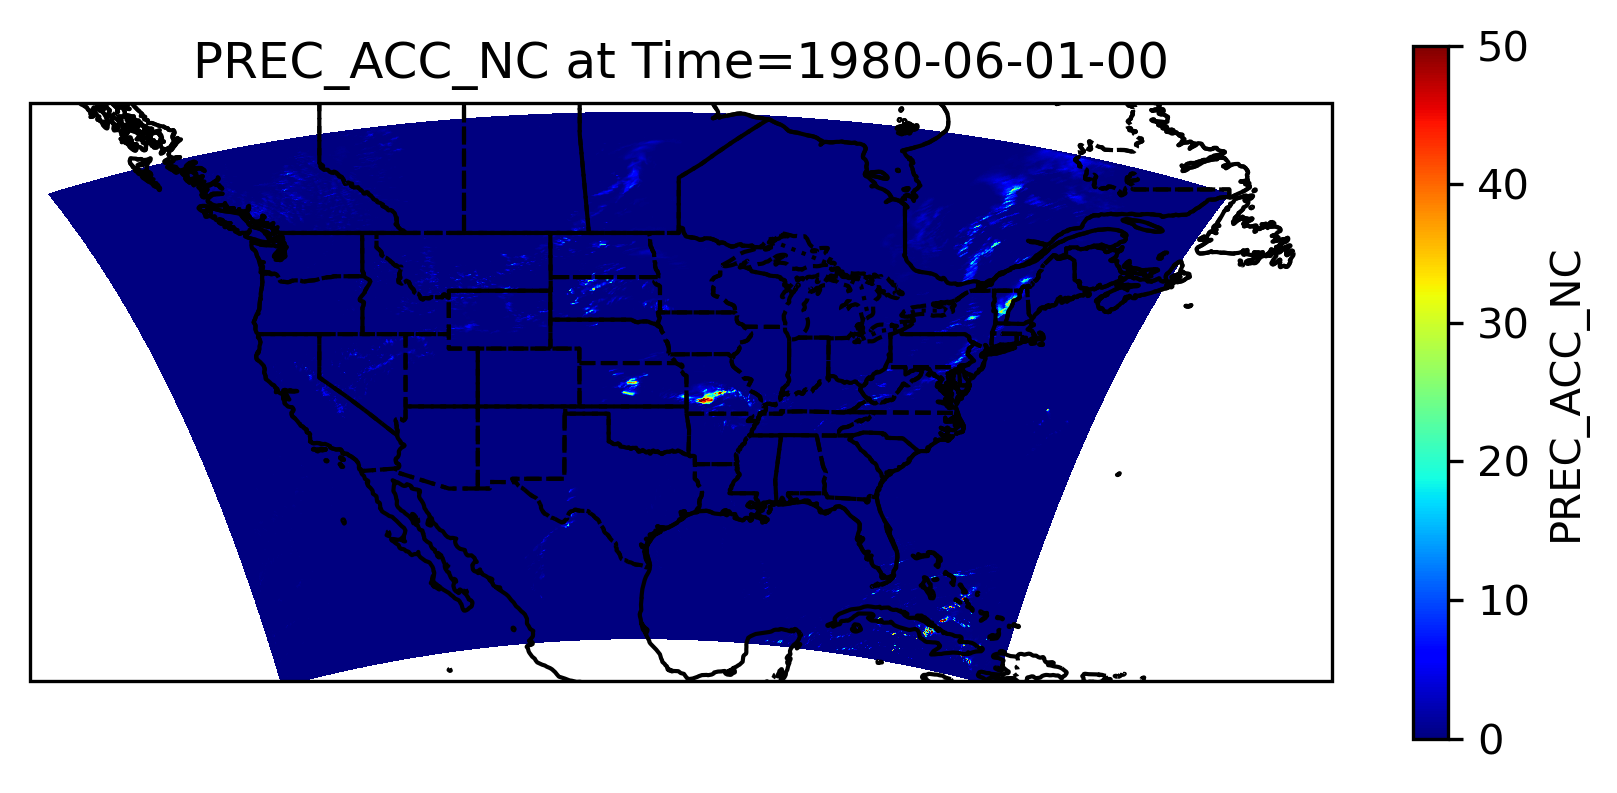

In [10]:

ds_sel = ds2.isel(Time=0)


prec = ds_sel["PREC_ACC_NC"]        # (south_north, west_east)
lat  = ds_sel["XLAT"]              # (south_north, west_east)
lon  = ds_sel["XLONG"]             # (south_north, west_east)

# 3) 创建图形并设置投影
fig = plt.figure(figsize=(7, 3), dpi=300)
ax = plt.axes(projection=ccrs.PlateCarree())


mesh = ax.pcolormesh(
    lon, 
    lat, 
    prec,
    transform=ccrs.PlateCarree(),
    cmap="jet",vmax=50,
)

# 5) 添加地理要素和颜色条
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=":")
ax.add_feature(cfeature.STATES, edgecolor="black", linestyle="--")

# 可选：设置地图显示范围
ax.set_extent([-140, -50, 18, 58], crs=ccrs.PlateCarree())

plt.colorbar(mesh, ax=ax, label="PREC_ACC_NC")
plt.title("PREC_ACC_NC at Time=1980-06-01-00")
plt.show()